In [1]:
#Importing the libraries used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings

In [2]:
defaultTest = pd.read_csv("test.csv") #importing the dataframe 'test.csv' from the appropriate folder
defaultTrain = pd.read_csv("train.csv") #importing the dataframe 'train.csv' from the appropriate folder
fulldf = pd.concat([defaultTest, defaultTrain]) #merging  the 2 datasets, so that we can work as if we were given the undivided
#dataset in the first place.
fulldf.index.name = 'i' #renaming the index column so that the new index will not have the same name as the old
fulldf = fulldf.reset_index() #Resetting the indexes for appearance's sake.
fulldf = fulldf.drop(['i', 'Unnamed: 0'], axis = 1) #removing the columns of indexes which we changed: the change was not
#necessary, only for the sake of appearance
fulldf

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
fulldf.groupby(['Class', 'Gender']).count()['id']


Class     Gender
Business  Female    31263
          Male      30897
Eco       Female    29670
          Male      28639
Eco Plus  Female     4966
          Male       4445
Name: id, dtype: int64

## Data Cleanning

In [4]:
dupl = fulldf.groupby(['id']).size()>1
dupl.value_counts()
#Checking that there are no duplicates (no values that are true)

False    129880
dtype: int64

In [5]:
fulldf = fulldf.drop(['id'], axis = 1) #Further unneded attribute


In [6]:
fulldf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [7]:
print('Gender:\n', fulldf['Gender'].value_counts(), '\n')
print('Customer Type:\n', fulldf['Customer Type'].value_counts(), '\n')
print('Type of Travel:\n', fulldf['Type of Travel'].value_counts(), '\n')
print('Class:\n', fulldf['Class'].value_counts(), '\n')
print('satisfaction:\n', fulldf['satisfaction'].value_counts(), '\n')

Gender:
 Female    65899
Male      63981
Name: Gender, dtype: int64 

Customer Type:
 Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64 

Type of Travel:
 Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64 

Class:
 Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64 

satisfaction:
 neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64 



In [8]:
#Encoding values from string to numerical

fulldf['Gender'] = fulldf['Gender'].replace({"Male": 0, "Female": 1})
fulldf['satisfaction'] = fulldf['satisfaction'].replace({"neutral or dissatisfied": 0, "satisfied": 1})
fulldf['Type of Travel'] = fulldf['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})
fulldf['Customer Type'] = fulldf['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
fulldf['Class'] = fulldf['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
fulldf

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
129876,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
129877,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
129878,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


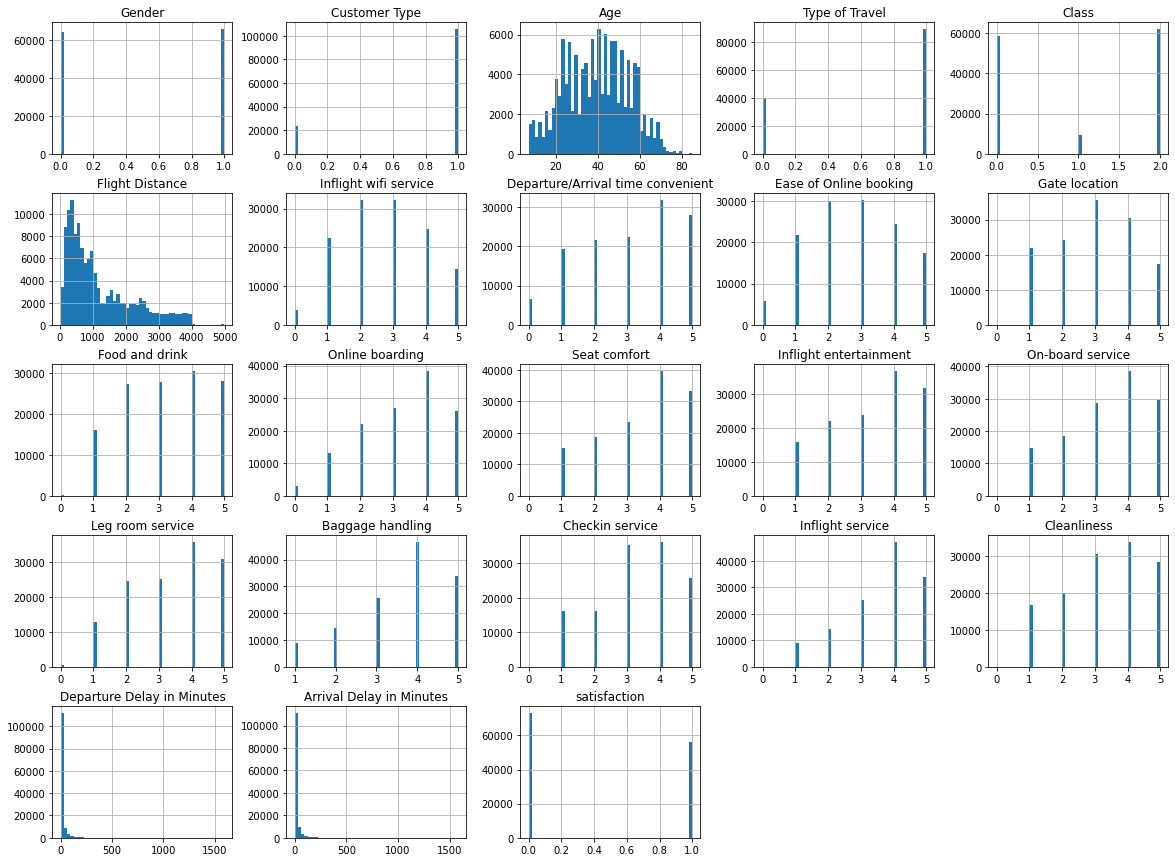

In [9]:
warnings.filterwarnings('ignore')
fulldf.hist(bins=50, figsize=(20,15))
plt.show()

## Dealing with NaN values

In [10]:
fulldf[fulldf.isna().any(axis=1)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,1,1,21,0,0,632,1,5,1,4,...,2,4,2,5,4,5,2,9,NaN,0
656,0,1,9,0,0,762,2,5,2,2,...,4,2,5,2,5,2,4,51,NaN,0
1071,0,0,25,1,0,1017,3,4,4,5,...,5,2,5,2,3,2,5,126,NaN,0
1224,0,1,7,0,0,399,4,5,4,4,...,4,4,3,1,1,4,4,0,NaN,0
1589,1,1,58,1,0,129,5,3,3,3,...,5,5,5,5,3,5,5,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128043,0,1,49,0,1,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,0
128360,0,1,58,1,0,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,0
128528,1,0,29,1,0,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,0
128936,0,1,58,1,0,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,1


<AxesSubplot:>

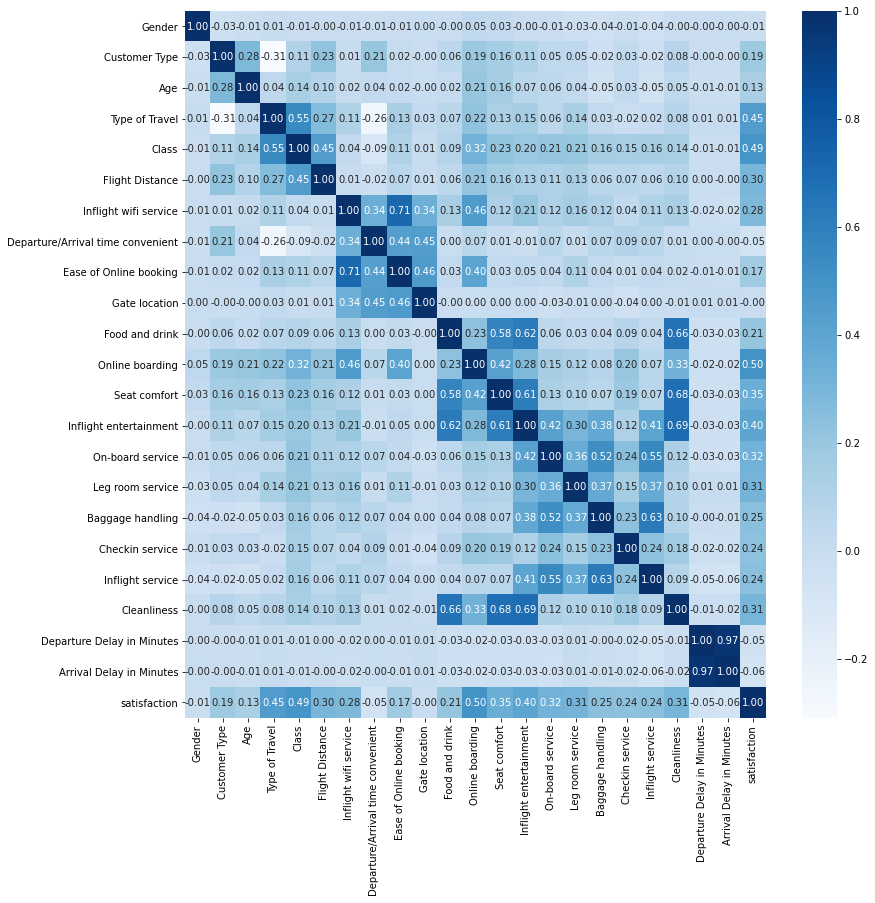

In [11]:
plt.figure(figsize=(13,13))
sns.heatmap(fulldf.corr(), cmap = 'Blues', annot=True, fmt=".2f")

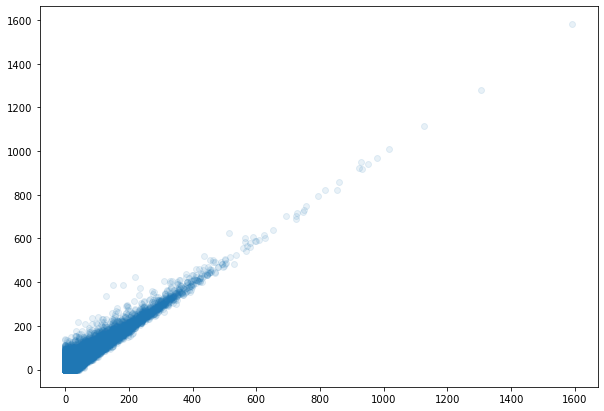

In [12]:
fig = plt.figure(figsize = (10,7))
plt.scatter(fulldf['Departure Delay in Minutes'], fulldf['Arrival Delay in Minutes'], alpha = 0.1)

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

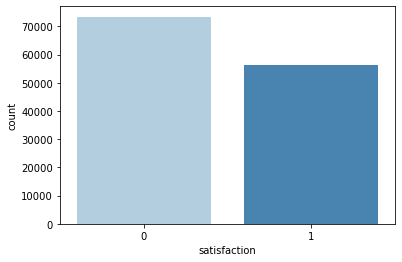

In [13]:
sns.countplot(x='satisfaction',data=fulldf, palette = 'Blues')

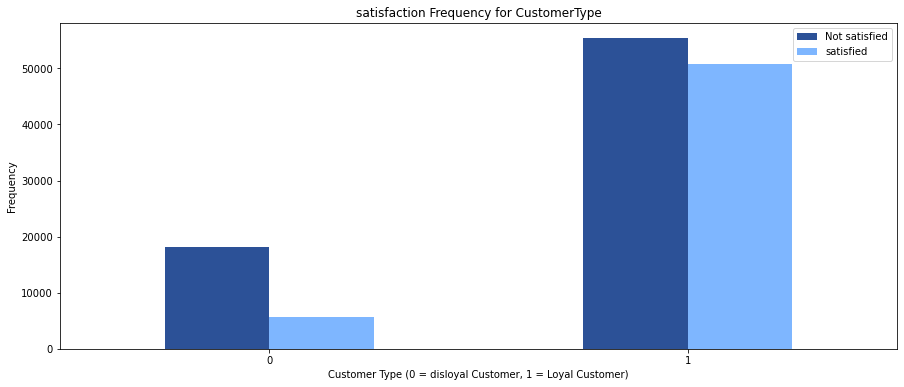

In [14]:
pd.crosstab(fulldf['Customer Type'],fulldf.satisfaction).plot(kind="bar",figsize=(15,6),color=['#2C5197','#7EB6FF' ])
plt.title('satisfaction Frequency for CustomerType')
plt.xlabel('Customer Type (0 = disloyal Customer, 1 = Loyal Customer)')
plt.xticks(rotation=0)
plt.legend(["Not satisfied", "satisfied"])
plt.ylabel('Frequency')
plt.show()

In [15]:
fulldf['Arrival Delay in Minutes'].fillna(fulldf['Departure Delay in Minutes'], inplace = True)

In [16]:
fulldf = fulldf.drop(['Departure Delay in Minutes'], axis = 1) #removing the departure delay in minutes -
#correlation is 0.96 - very high, no need for both as one follows mostly from the other

In [17]:
fulldf.info() #Presenting the final dataset info before maachine learning algorithms for future reference

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [18]:
x = fulldf.drop(['satisfaction'], axis = 1)
y = fulldf['satisfaction']

In [19]:
z = x.values #returns a numpy array
min_max_scaler = MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z)
x = pd.DataFrame(z_scaled)
x

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.8,...,0.8,0.6,1.0,1.0,1.0,1.00,0.4,1.0,1.0,0.027778
1,1.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.2,...,0.8,1.0,0.8,0.8,0.8,0.75,0.6,0.8,1.0,0.000000
2,0.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.8,...,0.4,0.4,0.4,0.8,0.2,0.50,0.4,0.4,0.4,0.000000
3,0.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.4,...,0.8,0.8,0.2,0.2,0.2,0.00,0.6,0.2,0.8,0.003788
4,1.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.6,...,0.2,0.4,0.4,0.4,0.4,0.25,0.8,0.4,0.8,0.012626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,0.0,0.205128,1.0,0.0,0.032512,0.4,0.2,0.4,0.6,...,0.4,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.000000
129876,0.0,1.0,0.538462,1.0,1.0,0.467690,0.8,0.8,0.8,0.8,...,0.8,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000
129877,0.0,0.0,0.294872,1.0,1.0,0.396607,0.2,0.2,0.2,0.6,...,0.2,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.008838
129878,1.0,0.0,0.192308,1.0,0.0,0.195679,0.2,0.2,0.2,1.0,...,0.2,0.2,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000


## Models

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

## Dummy classifer

In [21]:
dummyModel = DummyClassifier(strategy="most_frequent")
dummyModel.fit(X_train, y_train)
predictionsDummy = dummyModel.predict(X_test)

accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
accuracyDummy

0.5637511549122267

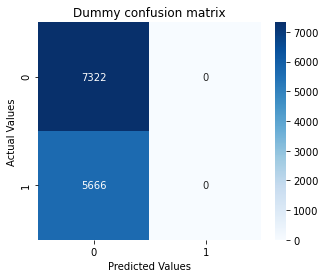

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsDummy), cmap = "Blues", annot=True, fmt = '.0f')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Dummy confusion matrix');

## KNN: K Nearest Neighbor

In [23]:
def chooseKNN():
    maxi = 1 #saving the index of the highest score
    max = 0 #saving the value of the highest score
    for i in range(1,20):
        modelKNN = KNeighborsClassifier(n_neighbors = i, weights='distance')
        modelKNN.fit(X_train, y_train)
        accuracy = modelKNN.score(X_test, y_test)
        if (accuracy > max):
            maxi = i
            max = accuracy
    print(maxi, "  ", max)
#chooseKNN()
#The value for maxi returned was: 9
#The value for max was: 0.9335540498922081

In [24]:
modelKNN = KNeighborsClassifier(n_neighbors = 9, weights='distance')
modelKNN.fit(X_train, y_train)
predictionsKNN = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN) #Resturns the same value as the score() method in the
#previous cell
accuracyKNN

0.9335540498922081

In [25]:
def chooseKFold(model):
    maxi = 1 #saving the index of the highest score
    max = 0 #saving the value of the highest score
    for i in range(2,20):
        accuracy = cross_val_score(model, X_train, y_train, cv = i).mean()
        if (accuracy > max):
            maxi = i
            max = accuracy
    print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)

In [26]:
#chooseKFold(modelKNN)
#The value for maxi returned was: 19
#The value for max was: 0.9317832165238031

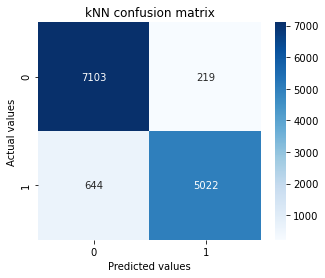

In [27]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsKNN), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('kNN confusion matrix');

In [28]:
print(classification_report(y_test, predictionsKNN))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7322
           1       0.96      0.89      0.92      5666

    accuracy                           0.93     12988
   macro avg       0.94      0.93      0.93     12988
weighted avg       0.93      0.93      0.93     12988



## Logistic Regression

In [29]:
modelLogReg = LogisticRegression()
modelLogReg.fit(X_train, y_train)
predictionsLogReg = modelLogReg.predict(X_test)
accuracyLogReg = modelLogReg.score(X_test, y_test)
accuracyLogReg

0.8728826609177702

In [30]:
#chooseKFold(modelLogReg)
print('The values returned by the function were:\n', 'The optimal K-fold is: 12 and its score is 0.8742771104951578')

The values returned by the function were:
 The optimal K-fold is: 12 and its score is 0.8742771104951578


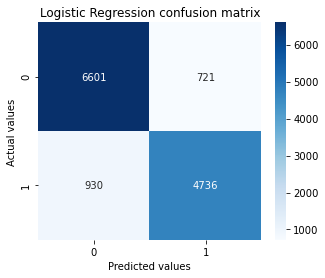

In [31]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsLogReg), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Logistic Regression confusion matrix');

In [32]:
print(classification_report(y_test, predictionsLogReg))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7322
           1       0.87      0.84      0.85      5666

    accuracy                           0.87     12988
   macro avg       0.87      0.87      0.87     12988
weighted avg       0.87      0.87      0.87     12988



In [33]:
probsKNN = modelKNN.predict_proba(X_test)[:, 1]
probsLogReg = modelLogReg.predict_proba(X_test)[:, 1]
dummyProbs = dummyModel.predict_proba(X_test)[:, 1]

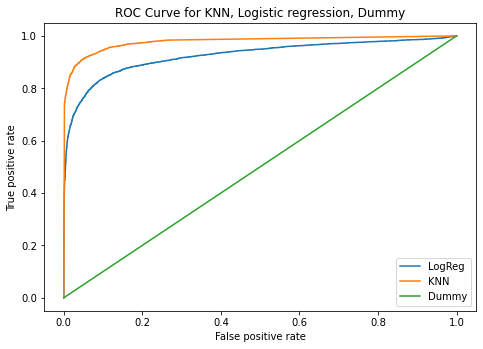

In [34]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, probsLogReg)
fprKNN, tprKNN, thresholdsKNN = metrics.roc_curve(y_test, probsKNN)
fprDummy, tprDummy, thresholdsDummy = metrics.roc_curve(y_test, dummyProbs)
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(fprLR, tprLR, label = "LogReg")
axes.plot(fprKNN, tprKNN, label = "KNN")
axes.plot(fprDummy, tprDummy, label = "Dummy")
axes.set_xlabel("False positive rate")
axes.set_ylabel("True positive rate")
axes.set_title("ROC Curve for KNN, Logistic regression, Dummy")
axes.legend()

In [35]:
print('AUC of Logistic Regression model:', metrics.auc(fprLR, tprLR))
print('AUC of KNN model:', metrics.auc(fprKNN, tprKNN))
print('AUC of Dummy model:', metrics.auc(fprDummy, tprDummy))

AUC of Logistic Regression model: 0.9248094052487305
AUC of KNN model: 0.9779561771153629
AUC of Dummy model: 0.5


Text(0.5, 1.0, 'Accuracy Scores of the different models')

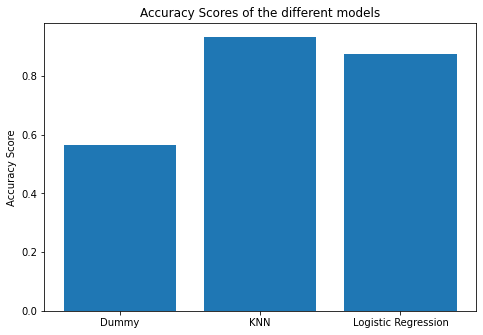

In [36]:
fig = plt.figure()
accuracies = [accuracyDummy, accuracyKNN, accuracyLogReg]
accuraciesSize = np.arange(len(accuracies))
axes = fig.add_axes([0,0,1,1])
axes.bar(['Dummy', 'KNN', 'Logistic Regression'], accuracies)
axes.set_ylabel("Accuracy Score")
axes.set_title("Accuracy Scores of the different models")

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import warnings
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import time
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
#Relevant imports

In [38]:
#Gaussian Naive Bayes
start_timeGaussianNB = time.time()
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
predictionsGNB = modelGNB.predict(X_test)
accuracyGNB = metrics.accuracy_score(y_test, predictionsGNB)
print("Accuracy (XGBoost): ", accuracyGNB)
timeGNB = time.time() - start_timeGaussianNB
print("Time taken to achive result: %s seconds" % (timeGNB))

Accuracy (XGBoost):  0.8645672928857406
Time taken to achive result: 0.06332755088806152 seconds


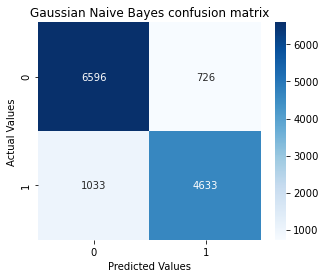

In [39]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsGNB), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Gaussian Naive Bayes confusion matrix');

In [40]:
print(classification_report(y_test, predictionsGNB))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7322
           1       0.86      0.82      0.84      5666

    accuracy                           0.86     12988
   macro avg       0.86      0.86      0.86     12988
weighted avg       0.86      0.86      0.86     12988



In [41]:
#Random Forests
start_timeRandForests = time.time()
modelRandForests = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = 0)
modelRandForests.fit(X_train, y_train)
predictionsRandForests = modelRandForests.predict(X_test)
accuracyRandForests = metrics.accuracy_score(y_test, predictionsRandForests)
print("Accuracy (Random Forests): ", accuracyRandForests)
timeRandForests = time.time() - start_timeRandForests
print("Time taken to achive result: %s seconds" % (timeRandForests))

Accuracy (Random Forests):  0.9634277794887589
Time taken to achive result: 25.875343799591064 seconds


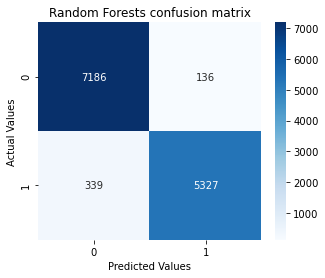

In [42]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forests confusion matrix');

In [43]:
print(classification_report(y_test, predictionsRandForests))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7322
           1       0.98      0.94      0.96      5666

    accuracy                           0.96     12988
   macro avg       0.97      0.96      0.96     12988
weighted avg       0.96      0.96      0.96     12988



In [44]:
#AdaBoost
start_timeAdaBoost = time.time()
modelDecTree = DecisionTreeClassifier(random_state=0, max_depth=2)
modelAdaBoost = AdaBoostClassifier(modelDecTree, n_estimators = 1000, random_state = 0, learning_rate = 1)
modelAdaBoost.fit(X_train, y_train)
predictionsAdaBoost = modelAdaBoost.predict(X_test)
accuracyAdaBoost = metrics.accuracy_score(y_test, predictionsAdaBoost)
print("Accuracy (AdaBoost): ", accuracyAdaBoost)
timeAdaBoost = time.time() - start_timeAdaBoost
print("Time taken to achive result: %s seconds" % (timeAdaBoost))

Accuracy (AdaBoost):  0.9575762242069603
Time taken to achive result: 152.19201278686523 seconds


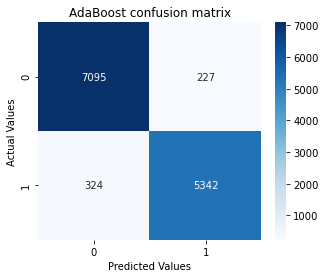

In [45]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsAdaBoost), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('AdaBoost confusion matrix');


In [46]:
print(classification_report(y_test, predictionsAdaBoost))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7322
           1       0.96      0.94      0.95      5666

    accuracy                           0.96     12988
   macro avg       0.96      0.96      0.96     12988
weighted avg       0.96      0.96      0.96     12988



In [47]:
#XGBoost
start_timeXGBoost = time.time()
warnings.filterwarnings('ignore')
modelXGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 200, verbosity = 0, use_label_encoder = False, n_jobs = -1)
modelXGBoost.fit(X_train, y_train)
predictionsXGBoost = modelXGBoost.predict(X_test)
accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
print("Accuracy (XGBoost): ", accuracyXGBoost)
timeXGBoost = time.time() - start_timeXGBoost
print("Time taken to achive result: %s seconds" % (timeXGBoost))

Accuracy (XGBoost):  0.9655066214967662
Time taken to achive result: 9.769498109817505 seconds


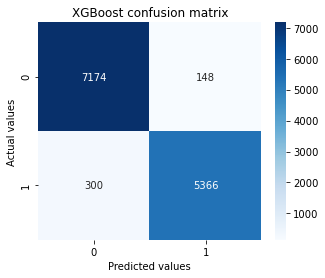

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsXGBoost), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('XGBoost confusion matrix');

In [49]:
print(classification_report(y_test, predictionsXGBoost))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7322
           1       0.97      0.95      0.96      5666

    accuracy                           0.97     12988
   macro avg       0.97      0.96      0.96     12988
weighted avg       0.97      0.97      0.97     12988



In [50]:
#Voting
start_timeVoting = time.time()
warnings.filterwarnings('ignore')
modelVoting = VotingClassifier(
    estimators=
        [('KNN', modelKNN),
         ('LogReg', modelLogReg),
         ('RandForests', modelRandForests),
         ('AdaBoost', modelAdaBoost),
         ('XGBoost', modelXGBoost)],
    voting='soft', n_jobs=-1, weights=[1,1,3,3,3])
modelVoting.fit(X_train, y_train)
predictionsVoting = modelVoting.predict(X_test)
accuracyVoting = metrics.accuracy_score(y_test, predictionsVoting)
print("Accuracy: ", accuracyVoting)
timeVoting = time.time() - start_timeVoting
print("Time taken to achive result: %s seconds" % (timeVoting))

Accuracy:  0.9654296273483215
Time taken to achive result: 248.07782173156738 seconds


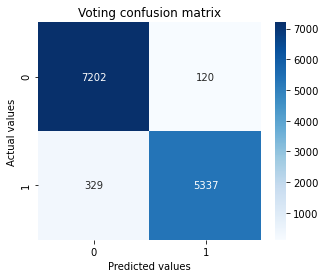

In [51]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsVoting), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Voting confusion matrix');

In [52]:
print(classification_report(y_test, predictionsVoting))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7322
           1       0.98      0.94      0.96      5666

    accuracy                           0.97     12988
   macro avg       0.97      0.96      0.96     12988
weighted avg       0.97      0.97      0.97     12988



In [53]:
#Bagging
start_timeBagging = time.time()
modelBagging = BaggingClassifier(modelXGBoost, n_estimators = 100, bootstrap = True)
modelBagging.fit(X_train, y_train)
predictionsBagging = modelBagging.predict(X_test)
accuracyBagging = metrics.accuracy_score(y_test, predictionsBagging)
print("Accuracy: ", accuracyBagging)
timeBagging = time.time() - start_timeBagging
print("Time taken to achive result: %s seconds" % (timeBagging))


Accuracy:  0.9657376039421004
Time taken to achive result: 1148.8285064697266 seconds


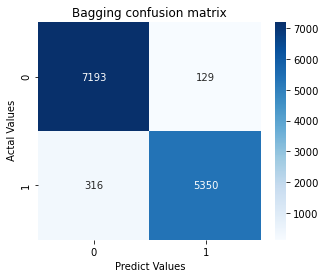

In [54]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsBagging), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predict Values')
plt.ylabel(' Actal Values')
plt.title('Bagging confusion matrix');

In [55]:
print(classification_report(y_test, predictionsBagging))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7322
           1       0.98      0.94      0.96      5666

    accuracy                           0.97     12988
   macro avg       0.97      0.96      0.97     12988
weighted avg       0.97      0.97      0.97     12988



In [56]:
#Pasting
start_timePasting = time.time()
modelPasting = BaggingClassifier(modelXGBoost, n_estimators = 100, bootstrap = False)
modelPasting.fit(X_train, y_train)
predictionsPasting = modelPasting.predict(X_test)
accuracyPasting = metrics.accuracy_score(y_test, predictionsPasting)
print("Accuracy: ", accuracyPasting)
timePasting = time.time() - start_timePasting
print("Time taken to achive result: %s seconds" % (timePasting))

Accuracy:  0.9655066214967662
Time taken to achive result: 1096.427638053894 seconds


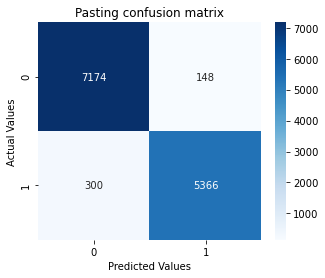

In [57]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsPasting), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Pasting confusion matrix');


In [58]:
print(classification_report(y_test, predictionsPasting))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7322
           1       0.97      0.95      0.96      5666

    accuracy                           0.97     12988
   macro avg       0.97      0.96      0.96     12988
weighted avg       0.97      0.97      0.97     12988



In [59]:
#Stacking
start_timeStacking = time.time()
modelStacking = StackingClassifier(estimators= [('KNN', modelKNN),
                                      ('LogReg', modelLogReg),
                                      ('RandForests', modelRandForests),
                                      ('AdaBoost', modelAdaBoost),
                                      ('XGBoost', modelXGBoost)], 
                         final_estimator=modelXGBoost)
modelStacking.fit(X_train, y_train)
predictionsStacking = modelStacking.predict(X_test)
accuracyStacking = metrics.accuracy_score(y_test, predictionsStacking)
print("Accuracy: ", accuracyStacking)
timeStacking = time.time() - start_timeStacking
print("Time taken to achive result: %s seconds" % (timeStacking))

Accuracy:  0.9648906683092086
Time taken to achive result: 1160.0702159404755 seconds


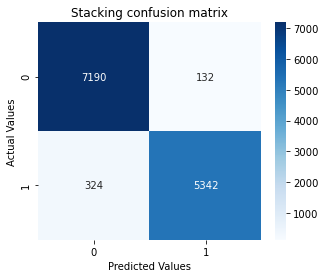

In [60]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsStacking), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Stacking confusion matrix');

In [61]:
print(classification_report(y_test, predictionsStacking))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7322
           1       0.98      0.94      0.96      5666

    accuracy                           0.96     12988
   macro avg       0.97      0.96      0.96     12988
weighted avg       0.97      0.96      0.96     12988



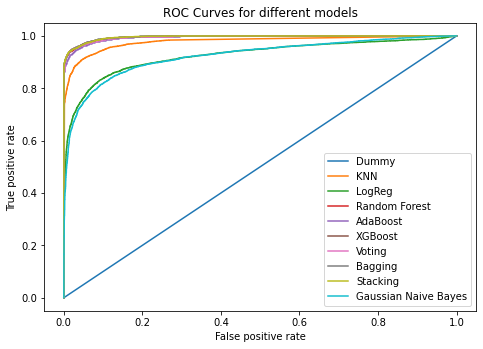

In [62]:
dummyProbs = dummyModel.predict_proba(X_test)[:, 1]
probsKNN = modelKNN.predict_proba(X_test)[:, 1]
probsLogReg = modelLogReg.predict_proba(X_test)[:, 1]
probsGNB = modelGNB.predict_proba(X_test)[:, 1]
probsRandomForests = modelRandForests.predict_proba(X_test)[:, 1]
probsAdaBoost = modelAdaBoost.predict_proba(X_test)[:, 1]
probsXGBoost = modelXGBoost.predict_proba(X_test)[:, 1]
probsVoting = modelVoting.predict_proba(X_test)[:, 1]
probsBagging = modelBagging.predict_proba(X_test)[:, 1]
probsStacking = modelStacking.predict_proba(X_test)[:, 1]

fprDummy, tprDummy, thresholdsDummy = metrics.roc_curve(y_test, dummyProbs)
fprKNN, tprKNN, thresholdsKNN = metrics.roc_curve(y_test, probsKNN)
fprLogReg, tprLogReg, thresholdsLogReg = metrics.roc_curve(y_test, probsLogReg)
fprGNB, tprGNB, thresholdsGNB = metrics.roc_curve(y_test, probsGNB)
fprRandFor, tprRandFor, thresholdsRandFor = metrics.roc_curve(y_test, probsRandomForests)
fprAdaB, tprAdaB, thresholdsAdaB = metrics.roc_curve(y_test, probsAdaBoost)
fprXGB, tprXGB, thresholdsXGB = metrics.roc_curve(y_test, probsXGBoost)
fprVot, tprVot, thresholdsVot = metrics.roc_curve(y_test, probsVoting)
fprBag, tprBag, thresholdsBag = metrics.roc_curve(y_test, probsBagging)
fprSta, tprSta, thresholdsSta = metrics.roc_curve(y_test, probsStacking)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(fprDummy, tprDummy, label = "Dummy")
axes.plot(fprKNN, tprKNN, label = 'KNN')
axes.plot(fprLogReg, tprLogReg, label = 'LogReg')
axes.plot(fprRandFor, tprRandFor, label = 'Random Forest')
axes.plot(fprAdaB, tprAdaB, label = 'AdaBoost')
axes.plot(fprXGB, tprXGB, label = 'XGBoost')
axes.plot(fprVot, tprVot, label = 'Voting')
axes.plot(fprBag, tprBag, label = 'Bagging')
axes.plot(fprSta, tprSta, label = 'Stacking')
axes.plot(fprGNB, tprGNB, label = 'Gaussian Naive Bayes')

axes.set_xlabel("False positive rate")
axes.set_ylabel("True positive rate")
axes.set_title("ROC Curves for different models")
axes.legend()

In [63]:
print('AUC of Dummy model:', metrics.auc(fprDummy, tprDummy))
print('AUC of KNN model:', metrics.auc(fprKNN, tprKNN))
print('AUC of Logistic Regression model:', metrics.auc(fprRandFor,tprRandFor))
print('AUC of Random forest model:', metrics.auc(fprLR, tprLR))
print('AUC of AdaBoost model:', metrics.auc(fprAdaB, tprAdaB))
print('AUC of XGBoost model:', metrics.auc(fprXGB, tprXGB))
print('AUC of Voting model:', metrics.auc(fprVot, tprVot))
print('AUC of Bagging model:', metrics.auc(fprBag, tprBag))
print('AUC of Stacking model:', metrics.auc(fprSta, tprSta))
print('AUC of Gaussian Naive Bayes model:', metrics.auc(fprGNB, tprGNB))


AUC of Dummy model: 0.5
AUC of KNN model: 0.9779561771153629
AUC of Logistic Regression model: 0.9945235254149957
AUC of Random forest model: 0.9248094052487305
AUC of AdaBoost model: 0.9932166529931266
AUC of XGBoost model: 0.9954277121601047
AUC of Voting model: 0.9944845849917461
AUC of Bagging model: 0.9955640458239234
AUC of Stacking model: 0.9954724014480678
AUC of Gaussian Naive Bayes model: 0.9228275052299002


In [64]:
results = pd.DataFrame(np.array([['Dummy', accuracyDummy, '---'],
                            ['KNN', accuracyKNN, '---'],
                            ['Logistic Regression', accuracyLogReg, '---'],
                            ['Gaussian Naive Bayes', accuracyGNB, timeGNB],
                            ['Random Forests', accuracyRandForests, timeRandForests],
                            ['AdaBoost', accuracyAdaBoost, timeAdaBoost],
                            ['XGBoost', accuracyXGBoost, timeXGBoost],
                            ['Voting', accuracyVoting, timeVoting],
                            ['Bagging', accuracyBagging, timeBagging],
                            ['Pasting', accuracyPasting, timePasting],
                            ['Stacking', accuracyStacking, timeStacking]]),
                  columns=['Model', 'Accuracy', 'Runtime (Seconds)'])
resultsView = results.style.set_properties(**{'text-align': 'left'})
resultsView

,Model,Accuracy,Runtime (Seconds)
0,Dummy,0.5637511549122267,---
1,KNN,0.9335540498922081,---
2,Logistic Regression,0.8728826609177702,---
3,Gaussian Naive Bayes,0.8645672928857406,0.06332755088806152
4,Random Forests,0.9634277794887589,25.875343799591064
5,AdaBoost,0.9575762242069603,152.19201278686523
6,XGBoost,0.9655066214967662,9.769498109817505
7,Voting,0.9654296273483215,248.07782173156738
8,Bagging,0.9657376039421004,1148.8285064697266
9,Pasting,0.9655066214967662,1096.427638053894


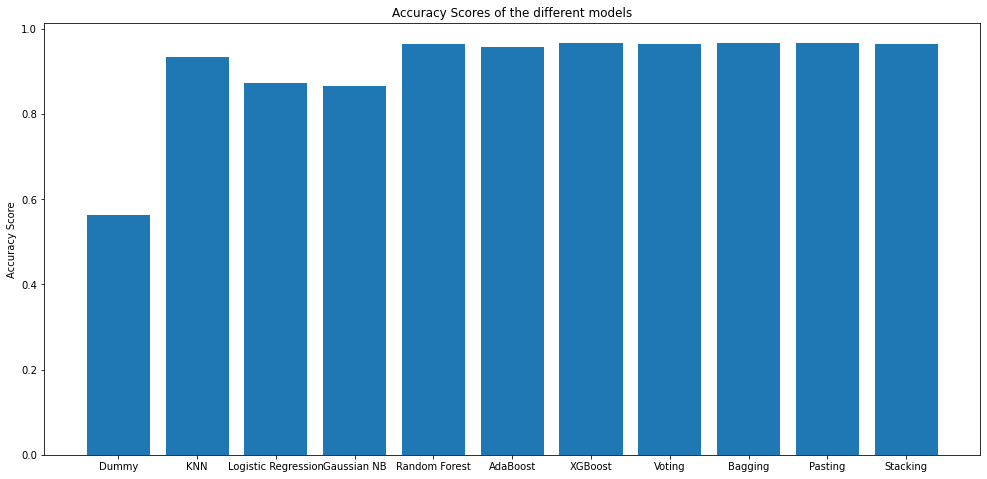

In [65]:
fig = plt.figure(figsize=(13,6))

accuracies = [accuracyDummy, accuracyKNN, accuracyLogReg, accuracyGNB, accuracyRandForests, accuracyAdaBoost,
              accuracyXGBoost, accuracyVoting, accuracyBagging, accuracyPasting, accuracyStacking]
accuraciesSize = np.arange(len(accuracies))
axes = fig.add_axes([0,0,1,1])
axes.bar(['Dummy', 'KNN', 'Logistic Regression', 'Gaussian NB', 'Random Forest', 'AdaBoost', 'XGBoost', 'Voting',
          'Bagging', 'Pasting', 'Stacking'], accuracies)
axes.set_ylabel("Accuracy Score")
axes.set_title("Accuracy Scores of the different models")
plt.rcParams['xtick.labelsize'] = 9

(0.957, 0.9664)

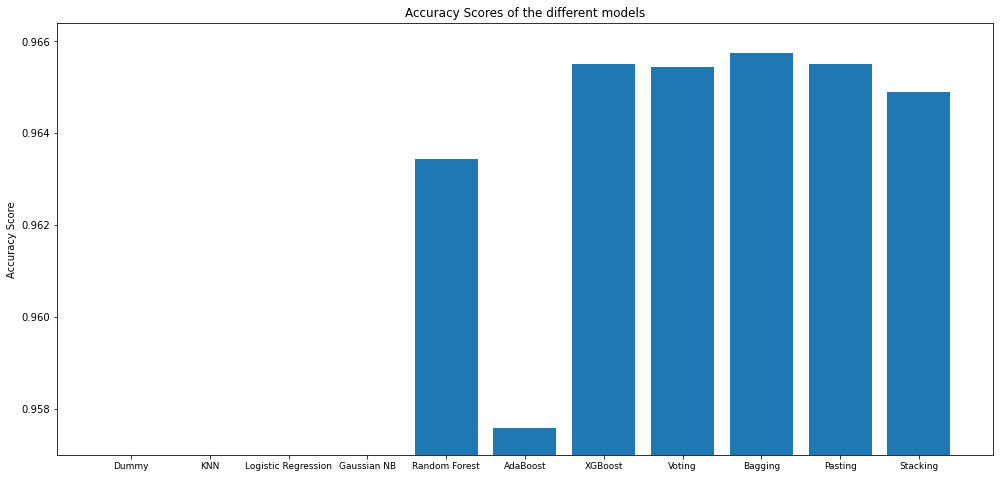

In [66]:
fig = plt.figure(figsize=(13,6))

accuracies = [accuracyDummy, accuracyKNN, accuracyLogReg, accuracyGNB, accuracyRandForests, accuracyAdaBoost,
              accuracyXGBoost, accuracyVoting, accuracyBagging, accuracyPasting, accuracyStacking]
accuraciesSize = np.arange(len(accuracies))
axes = fig.add_axes([0,0,1,1])
axes.bar(['Dummy', 'KNN', 'Logistic Regression', 'Gaussian NB', 'Random Forest', 'AdaBoost', 'XGBoost', 'Voting',
          'Bagging', 'Pasting', 'Stacking'], accuracies)
axes.set_ylabel("Accuracy Score")
axes.set_title("Accuracy Scores of the different models")
plt.rcParams['xtick.labelsize'] = 9
axes.set_ylim([0.957, 0.9664])

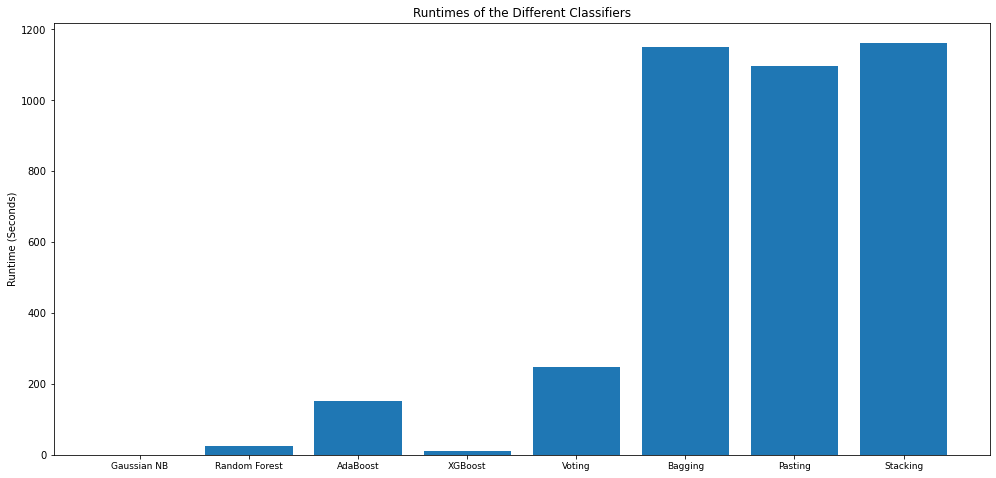

In [67]:
def timeGraph():
    fig = plt.figure(figsize=(13,6))

    time = [timeGNB, timeRandForests, timeAdaBoost, timeXGBoost, timeVoting, timeBagging, timePasting, timeStacking]
    timeSize = np.arange(len(time))
    axes = fig.add_axes([0,0,1,1])
    labels = ['Gaussian NB', 'Random Forest', 'AdaBoost', 'XGBoost', 'Voting', 'Bagging',
              'Pasting', 'Stacking']
    axes.bar(labels, time)
    axes.set_ylabel("Runtime (Seconds)")
    axes.set_title("Runtimes of the Different Classifiers")
    plt.rcParams['xtick.labelsize'] = 10
    
timeGraph()

In [68]:
resultsView

,Model,Accuracy,Runtime (Seconds)
0,Dummy,0.5637511549122267,---
1,KNN,0.9335540498922081,---
2,Logistic Regression,0.8728826609177702,---
3,Gaussian Naive Bayes,0.8645672928857406,0.06332755088806152
4,Random Forests,0.9634277794887589,25.875343799591064
5,AdaBoost,0.9575762242069603,152.19201278686523
6,XGBoost,0.9655066214967662,9.769498109817505
7,Voting,0.9654296273483215,248.07782173156738
8,Bagging,0.9657376039421004,1148.8285064697266
9,Pasting,0.9655066214967662,1096.427638053894


## PCA (Principal Component Analysis)

In [69]:
pca = PCA(n_components=0.9)
X_train_Reduced = pca.fit_transform(X_train)
X_test_Reduced = pca.transform(X_test)

#XGBoost after PCA
start_timeXGBoostPCA = time.time()
warnings.filterwarnings('ignore')
modelXGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 200, verbosity = 0, use_label_encoder = False, n_jobs = -1)
modelXGBoost.fit(X_train_Reduced, y_train)
predictionsXGBoostPCA = modelXGBoost.predict(X_test_Reduced)
accuracyXGBoostPCA = metrics.accuracy_score(y_test, predictionsXGBoostPCA)
print("Accuracy (XGBoost): ", accuracyXGBoost)
timeXGBoostPCA = time.time() - start_timeXGBoostPCA
print("Time taken to achive result: %s seconds" % (timeXGBoostPCA))

In [70]:
start_timeXGBoostPCA = time.time()
warnings.filterwarnings('ignore')
modelXGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 200, verbosity = 0, use_label_encoder = False, n_jobs = -1)
modelXGBoost.fit(X_train_Reduced, y_train)
predictionsXGBoostPCA = modelXGBoost.predict(X_test_Reduced)
accuracyXGBoostPCA = metrics.accuracy_score(y_test, predictionsXGBoostPCA)
print("Accuracy (XGBoost): ", accuracyXGBoost)
timeXGBoostPCA = time.time() - start_timeXGBoostPCA
print("Time taken to achive result: %s seconds" % (timeXGBoostPCA))

Accuracy (XGBoost):  0.9655066214967662
Time taken to achive result: 30.244149684906006 seconds


<AxesSubplot:>

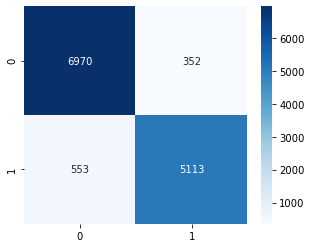

In [71]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsXGBoostPCA), cmap = "Blues", annot=True, fmt = '.0f')

In [72]:
print(classification_report(y_test, predictionsXGBoostPCA))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7322
           1       0.94      0.90      0.92      5666

    accuracy                           0.93     12988
   macro avg       0.93      0.93      0.93     12988
weighted avg       0.93      0.93      0.93     12988



In [73]:
#AdaBoost after PCA
start_timeAdaBoostPCA = time.time()
modelDecTree = DecisionTreeClassifier(random_state=0, max_depth=2)
modelAdaBoost = AdaBoostClassifier(modelDecTree, n_estimators = 1000, random_state = 0, learning_rate = 1)
modelAdaBoost.fit(X_train_Reduced, y_train)
predictionsAdaBoostPCA = modelAdaBoost.predict(X_test_Reduced)
accuracyAdaBoostPCA = metrics.accuracy_score(y_test, predictionsAdaBoostPCA)
print("Accuracy (AdaBoost): ", accuracyAdaBoostPCA)
timeAdaBoostPCA = time.time() - start_timeAdaBoostPCA
print("Time taken to achive result: %s seconds" % (timeAdaBoostPCA))

Accuracy (AdaBoost):  0.9141515244841392
Time taken to achive result: 434.0082550048828 seconds


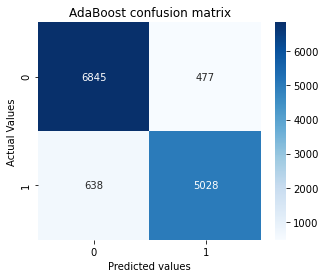

In [74]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsAdaBoostPCA), cmap = "Blues", annot=True, fmt = '.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.title('AdaBoost confusion matrix');

In [75]:
print(classification_report(y_test, predictionsAdaBoostPCA))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7322
           1       0.91      0.89      0.90      5666

    accuracy                           0.91     12988
   macro avg       0.91      0.91      0.91     12988
weighted avg       0.91      0.91      0.91     12988



In [76]:
def GridSearchXGBoost():
    paramsXGBoost = {
        'learning_rate': [0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'n_estimators': list(range(50, 1050, 50))
    }
    gridSearch = GridSearchCV(modelXGBoost, paramsXGBoost, cv=10, scoring='accuracy')


    start_timeGS = time.time()
    gridSearch.fit(X_train, y_train)
    timeGS = time.time() - start_timeGS
    print("Time taken to achive result: %s seconds" % (timeGS))
    pd.DataFrame(gridSearch.cv_results_)[['Average score', 'std_test_score', 'params']]

    # examine the best model
    print(gridSearch.best_score_)
    print(gridSearch.best_params_)
    

#GridSearchXGBoost()

    
#The results after the run of the function:
print("Best Average Accuracy: 0.9648050981375675 when the parameters were: learning_rate: 0.05 and n_estimators: 950")

Best Average Accuracy: 0.9648050981375675 when the parameters were: learning_rate: 0.05 and n_estimators: 950


In [77]:
#Improved XGBoost
start_timeXGBoostNew = time.time()
warnings.filterwarnings('ignore')
modelXGBoostNew = XGBClassifier(learning_rate = 0.05, n_estimators = 950, verbosity = 0, use_label_encoder = False, n_jobs = -1)
modelXGBoostNew.fit(X_train, y_train)
predictionsXGBoostNew = modelXGBoostNew.predict(X_test)
accuracyXGBoostNew = metrics.accuracy_score(y_test, predictionsXGBoostNew)
print("Accuracy (XGBoost): ", accuracyXGBoostNew)
timeXGBoostNew = time.time() - start_timeXGBoostNew
print("Time taken to achive result: %s seconds" % (timeXGBoostNew))
#0.9654296273483215

Accuracy (XGBoost):  0.9659685863874345
Time taken to achive result: 34.94728708267212 seconds


<AxesSubplot:>

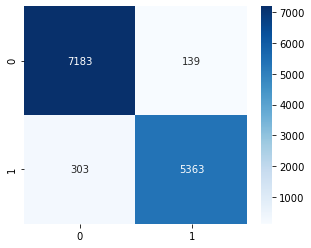

In [78]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsXGBoostNew), cmap = "Blues", annot=True, fmt = '.0f')

In [79]:
print(classification_report(y_test, predictionsXGBoostNew))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7322
           1       0.97      0.95      0.96      5666

    accuracy                           0.97     12988
   macro avg       0.97      0.96      0.97     12988
weighted avg       0.97      0.97      0.97     12988



In [80]:
results = pd.DataFrame(np.array([['Dummy', accuracyDummy, '---', '---', '---'],
                            ['KNN', accuracyKNN, '---', '---', '---'],
                            ['Logistic Regression', accuracyLogReg, '---', '---', '---'],
                            ['Random Forests', accuracyRandForests, timeRandForests, '---', '---'],
                            ['AdaBoost', accuracyAdaBoost, timeAdaBoost, accuracyAdaBoostPCA, timeAdaBoostPCA],
                            ['XGBoost - before Grid Search', accuracyXGBoost, timeXGBoost, accuracyXGBoostPCA, timeXGBoostPCA],
                            ['XGBoost - after Grid Search', accuracyXGBoostNew, timeXGBoostNew, '---', '---'],
                            ['Voting', accuracyVoting, timeVoting, '---', '---'],
                            ['Bagging', accuracyBagging, timeBagging, '---', '---'],
                            ['Pasting', accuracyPasting, timePasting, '---', '---'],
                            ['Stacking', accuracyStacking, timeStacking, '---', '---']]),
                  columns=['Model', 'Accuracy', 'Runtime (Seconds)', 'PCA Accuracy', 'PCA Runtime (Seconds)'])
resultsView = results.style.set_properties(**{'text-align': 'left'})
resultsView

,Model,Accuracy,Runtime (Seconds),PCA Accuracy,PCA Runtime (Seconds)
0,Dummy,0.5637511549122267,---,---,---
1,KNN,0.9335540498922081,---,---,---
2,Logistic Regression,0.8728826609177702,---,---,---
3,Random Forests,0.9634277794887589,25.875343799591064,---,---
4,AdaBoost,0.9575762242069603,152.19201278686523,0.9141515244841392,434.0082550048828
5,XGBoost - before Grid Search,0.9655066214967662,9.769498109817505,0.93032029565753,30.244149684906006
6,XGBoost - after Grid Search,0.9659685863874345,34.94728708267212,---,---
7,Voting,0.9654296273483215,248.07782173156738,---,---
8,Bagging,0.9657376039421004,1148.8285064697266,---,---
9,Pasting,0.9655066214967662,1096.427638053894,---,---


In [81]:
results = results.sort_values(by = 'Accuracy', axis = 0, ascending = False)
resultsView = results.style.set_properties(**{'text-align': 'left'})
resultsView

,Model,Accuracy,Runtime (Seconds),PCA Accuracy,PCA Runtime (Seconds)
6,XGBoost - after Grid Search,0.9659685863874345,34.94728708267212,---,---
8,Bagging,0.9657376039421004,1148.8285064697266,---,---
5,XGBoost - before Grid Search,0.9655066214967662,9.769498109817505,0.93032029565753,30.244149684906006
9,Pasting,0.9655066214967662,1096.427638053894,---,---
7,Voting,0.9654296273483215,248.07782173156738,---,---
10,Stacking,0.9648906683092086,1160.0702159404755,---,---
3,Random Forests,0.9634277794887589,25.875343799591064,---,---
4,AdaBoost,0.9575762242069603,152.19201278686523,0.9141515244841392,434.0082550048828
1,KNN,0.9335540498922081,---,---,---
2,Logistic Regression,0.8728826609177702,---,---,---


<AxesSubplot:>

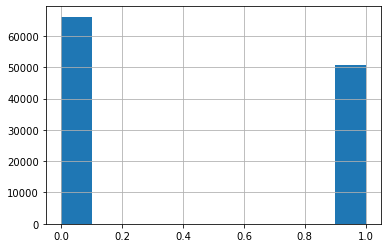

In [107]:
y_train.hist()

In [82]:
results = pd.DataFrame(np.array([['KNN', accuracyKNN, '---', '---', '---'],
                            ['Logistic Regression', accuracyLogReg, '---', '---', '---'],
                            ['Random Forests', accuracyRandForests, timeRandForests, '---', '---'],
                            ['AdaBoost', accuracyAdaBoost, timeAdaBoost, accuracyAdaBoostPCA, timeAdaBoostPCA],
                            ['XGBoost - before Grid Search', accuracyXGBoost, timeXGBoost, accuracyXGBoostPCA, timeXGBoostPCA],
                            ['XGBoost - after Grid Search', accuracyXGBoostNew, timeXGBoostNew, '---', '---'],
                            ['Voting', accuracyVoting, timeVoting, '---', '---'],
                            ['Bagging', accuracyBagging, timeBagging, '---', '---'],
                            ['Stacking', accuracyStacking, timeStacking, '---', '---']]),
                  columns=['Model', 'f1-score', 'Runtime (Seconds)', 'PCA Accuracy', 'PCA Runtime (Seconds)'])
resultsView = results.style.set_properties(**{'text-align': 'left'})
resultsView

,Model,f1-score,Runtime (Seconds),PCA Accuracy,PCA Runtime (Seconds)
0,KNN,0.9335540498922081,---,---,---
1,Logistic Regression,0.8728826609177702,---,---,---
2,Random Forests,0.9634277794887589,25.875343799591064,---,---
3,AdaBoost,0.9575762242069603,152.19201278686523,0.9141515244841392,434.0082550048828
4,XGBoost - before Grid Search,0.9655066214967662,9.769498109817505,0.93032029565753,30.244149684906006
5,XGBoost - after Grid Search,0.9659685863874345,34.94728708267212,---,---
6,Voting,0.9654296273483215,248.07782173156738,---,---
7,Bagging,0.9657376039421004,1148.8285064697266,---,---
8,Stacking,0.9648906683092086,1160.0702159404755,---,---
